# PCA per dataset piccoli
Il PCA è molto utile per dataset con pochi samples, in cui riuslta quindi molto utile poter considerare solo le features davvero rilevanti.

Non sapendo a priori quali sono le feature più rilevanti non tentiamo di capire quali sono, piuttosto: **trasformiamo la rappresentazione dei dati diminuendo il numero di features tra loro indipendenti e costruite ad hoc**.

## Carichiamo un dataset

In [ ]:
import matplotlib.pyplot as plt # creazioni grafici
 # dataset da scaricare con  %pip install scikit-learn matplotlib
from sklearn.datasets import load_breast_cancer

# caricamento dataset
dataset = load_breast_cancer()

# ogni riga è un campione e ogni colonna una feature
X = dataset.data
# nomi features
feature_names = dataset.feature_names

# lable (0 benigno, 1 maligno)
y = dataset.target
# nomi delle lable (benigno e maligno)
target_names = dataset.target_names

# numero di campioni
n_samples = X.shape[0]
# numero features
n_features = X.shape[1]
# numero di classi per la classificazione (label) cioè 2: 'benigno' e 'maligno'
n_classes = target_names.shape[0]

# Stampa info
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print(dataset.DESCR) # descrizione del dataset

Total dataset size:
n_samples: 569
n_features: 30
n_classes: 2
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radiu

## Plot
Funzione per visualizzare i dati in uno spazio bidimensionale (si scelgono le due features da visualizzare)

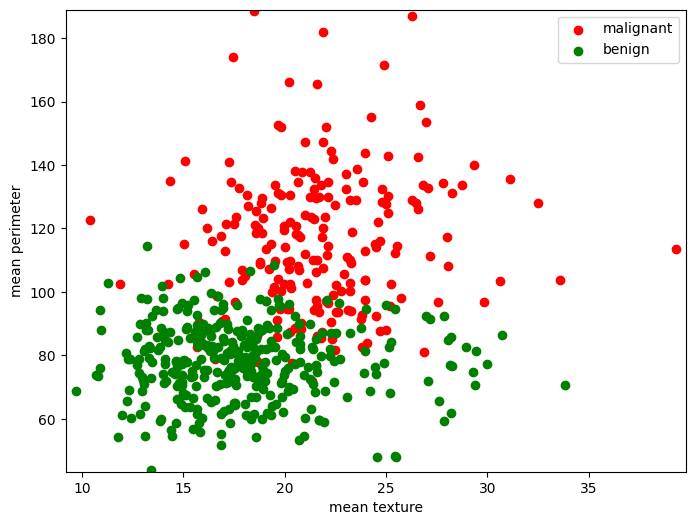

In [ ]:
def plot_2D(X, y, target_names, feature_names, f1, f2, fig_id):
  '''
    X: matrice dei dati
    y: lable
    target_names: nome delle lable
    feature_names: i nomi delel features
    f1: indice prima feature su cui graficare
    f2: indice seconda feature su cui graficare
    fig_id: identificatore univoco per la figura creata
  '''
  # Minimum and maximum extraction delle due features
  x_min, x_max = X[:, f1].min() - .5, X[:, f1].max() + .5
  y_min, y_max = X[:, f2].min() - .5, X[:, f2].max() + .5
  # Figure creation
  ## fig_id -> id della figura da creare
  plt.figure(fig_id, figsize=(8, 6))

  # Drawing the points
  ## assegna colori ai punti a seconda della lable se maligna o binigna
  colors = ['red','green']
  for i in range(n_classes):
      plt.scatter(X[y==i, f1], X[y==i, f2], color=colors[i], label=target_names[i])
  plt.legend()
  # Axis labelling
  plt.xlabel(feature_names[f1])
  plt.ylabel(feature_names[f2])
  # Axis limitation
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  # Visualization
  plt.show()



# ESEMPIO DI UTILIZZO
# Drawing dataset samples considering two features f1 and f2
f1 = 1
f2 = 2
plot_2D(X, y, target_names, feature_names, f1, f2, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Spliting del dataset
## stratify -> fa in modo che le lable sia divise equamente tra training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Standardizzazione dati
Standardiziamo i dati con media e deviazione standard del training.


**(LA MEDIA E LA DEVIAZIONE CUI CUI SI NORMALIZZA È UN IPERPARAMETRO DEL MODELLO)**

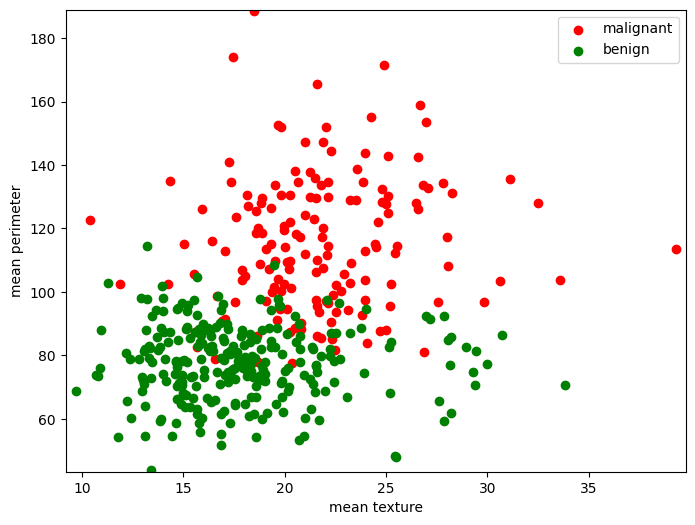

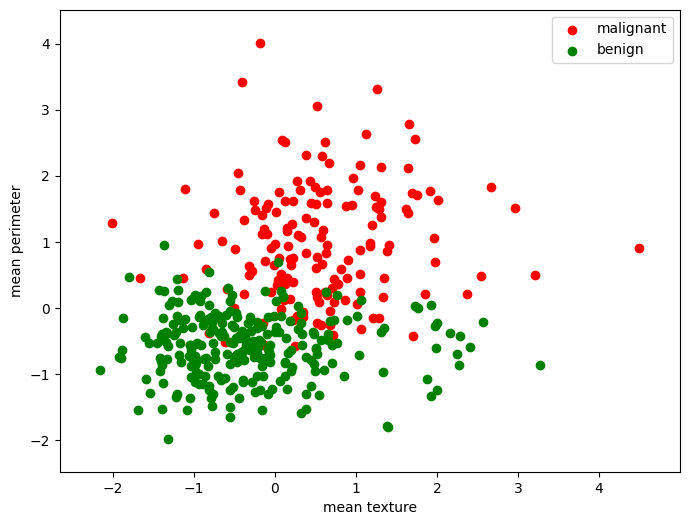

In [ ]:
from sklearn.preprocessing import StandardScaler # libreria per standardizzare


sc = StandardScaler() # oggetto per fare la standardizzazione
# fit -> indica che su questi dati calcola media e deviazione standard
# trasnform -> normalizza i dati con media e deviazione calcolate
X_train_std = sc.fit_transform(X_train)
# il test li normalizza con media e deviazione standard del trainging
# (LA MEDIA E LA DEVIAZIONE CUI CUI SI NORMALIZZA È UN IPERPARAMETRO DEL MODELLO)
X_test_std = sc.transform(X_test)

# Visualizzazione dati
plot_2D(X_train, y_train, target_names, feature_names, f1, f2, 1) # trainig set su f1 ed f2
plot_2D(X_train_std, y_train, target_names, feature_names, f1, f2, 2)# trainig set STANDARDIZZATO su f1 ed f2

## PCA

### K = D
In RCA non sempre si punta a ridurre la dimensione, ci possiamo limitare ad avere la stessa dimensione ma cambiare rappresentabilità 

Components
[[ 2.20251627e-01  9.64783283e-02  2.28778679e-01  2.22323257e-01
   1.44305349e-01  2.42003810e-01  2.58324479e-01  2.63094793e-01
   1.40465956e-01  6.44129178e-02  2.00935542e-01 -4.67077534e-04
   2.06716576e-01  2.01676997e-01 -5.55310190e-03  1.64847795e-01
   1.50662136e-01  1.83723239e-01  4.86461125e-02  9.30691665e-02
   2.29018494e-01  9.89543980e-02  2.37447255e-01  2.25427737e-01
   1.24999118e-01  2.12188515e-01  2.32019785e-01  2.52036635e-01
   1.31804752e-01  1.33823531e-01]
 [-2.33222674e-01 -6.77080925e-02 -2.14642679e-01 -2.28918196e-01
   1.78947226e-01  1.49222718e-01  6.85794855e-02 -3.39201408e-02
   1.89014473e-01  3.63390785e-01 -1.10340655e-01  8.48565870e-02
  -9.28744510e-02 -1.59929132e-01  1.98725243e-01  2.38445646e-01
   2.05198524e-01  1.33310549e-01  1.82580788e-01  2.78464851e-01
  -2.17111966e-01 -4.89701630e-02 -1.97511966e-01 -2.15110679e-01
   1.67884292e-01  1.46033682e-01  1.06945135e-01 -2.68301307e-03
   1.45622722e-01  2.77418866e

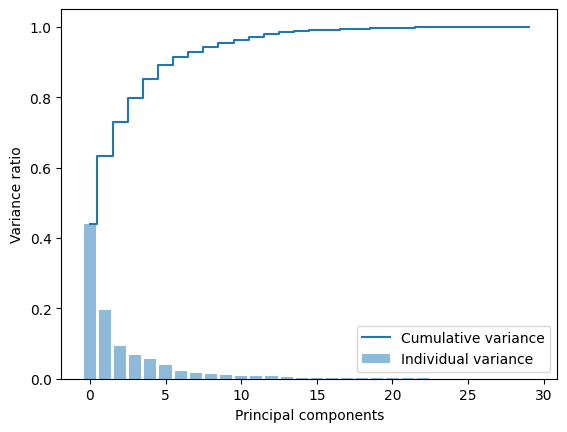

In [ ]:
from sklearn.decomposition import PCA # importa a PCA
import matplotlib.pyplot as plt # visualizzazione grafica
import numpy as np


# K = D
n_components = n_features

# Trova n_components con l'algoritmo PCA 
pca = PCA(n_components=n_components)
pca.fit(X_train_std)

# Components - gli autovettori ordinati in base al valore degli autovalori (dal maggiore al minore)
print("Components")
print(pca.components_)
# Norm (modulo del vettore) [sempre 1 essendo dei versori]
print("Norm")
for component in pca.components_:
  print(np.linalg.norm(component))
# Singular values - Autovalori
print("Singular values - Eigenvalues")
print(pca.singular_values_)

# PLOT DA USARE PER LA VARIANZA
def plot_variance(variance, cum_variance, interval, x_label, y_label):
    plt.bar(interval, variance, alpha = 0.5, align='center', label = 'Individual variance')
    plt.step(interval, cum_variance, where='mid', label = 'Cumulative variance')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='best')
    plt.show()

## pca.explained_variance_ratio_ -> percentuale di varianza spiegata da ciascuna componente (autovettore)
# np.cumsum(pca.explained_variance_ratio_) -> calcola la varianza comulata per ciascuna componente
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# grafico che mostra la varianza per compoente
plot_variance(pca.explained_variance_ratio_, cumulative_variance, np.arange(n_components), 'Principal components', 'Variance ratio')




### K-Nearest Neighbors
*(Studiato anche in regressione non supervisionata)*

- Vediamo sia la varianza comulata (1' grafico),
- Sia l'accuracy al aumentare del numero delle dimensioni (2' grafico)

#### Classificatore KNN
Non ha una vera fase di addestramento classica.
per un nuovo dato il modello alcola la distanza tra tutti i punti e determina i k più vicini

(n_neighbors=1)-> prende la classe del oggetto più vicino

- *classifier = KNeighborsClassifier(n_neighbors=1)* # trova solo il primo più vicino

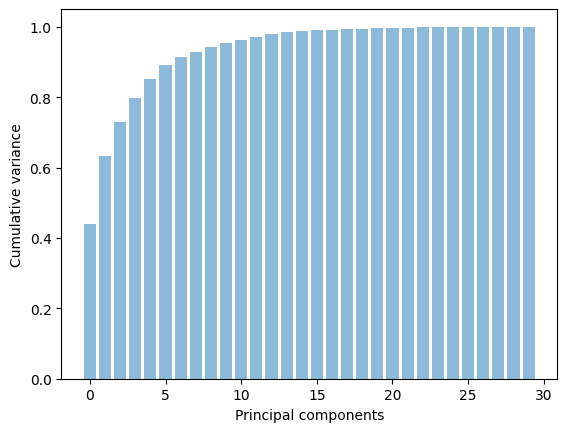

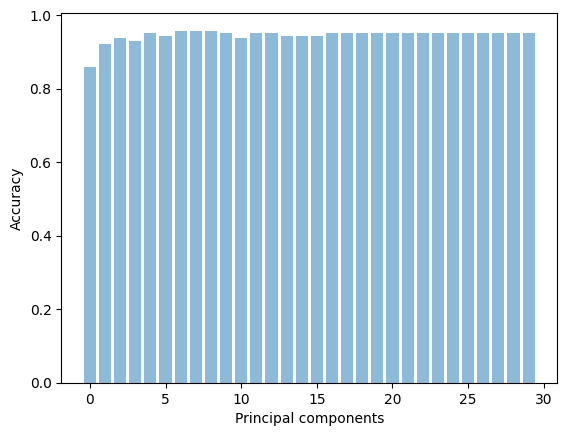

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Classificatore KNN
## non ha una vera fase di addestramento classica.
## per un nuovo dato il modello alcola la distanza tra tutti i punti e determina i k più vicini
## (n_neighbors=1) -> prende la classe del oggetto più vicino
classifier = KNeighborsClassifier(n_neighbors=1) # trova solo il primo più vicino

# APPLICAZIONE DI PCA da 1 a n_components (tutte le features)
accuracy = []
n_components = n_features

for K in range(1,n_components+1):
    pca = PCA(n_components = K)
    # fa la trasformazione a 'K' componenti con autovalori maggiori
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std) # col test fai la stessa trasformazione
    
    # Allenamento di un classificatore
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))

# GRAFICO ACCURATEZZA
def plot_bar_chart(data, interval, x_label, y_label):
    plt.bar(interval, data, alpha = 0.5, align='center')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plot_bar_chart(cumulative_variance, np.arange(n_components), 'Principal components', 'Cumulative variance')
plot_bar_chart(accuracy, np.arange(n_components), 'Principal components', 'Accuracy')

## Regioni di decisione
- Grafico 1' : lable su solo 2 caratteristiche calcolate da PCA 
- Grafico 2' : lable progliettate su due feature casuali tra quelle presenti nel dataset

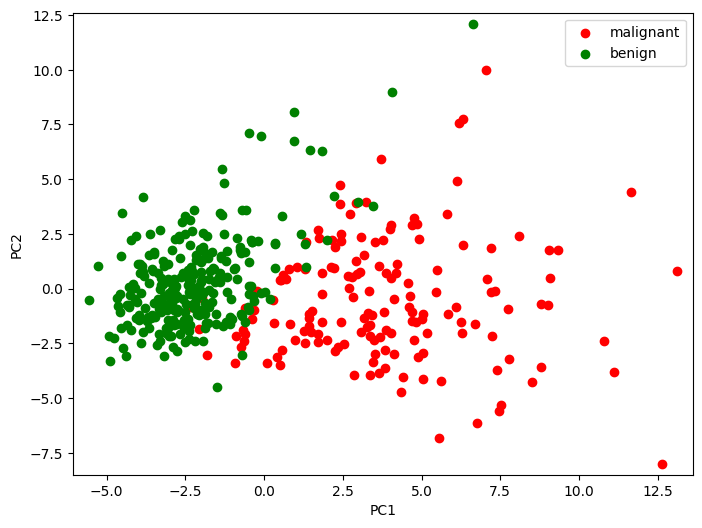

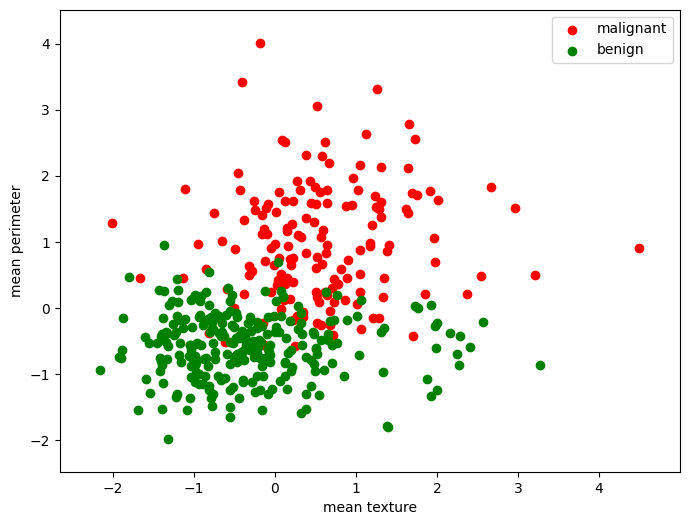

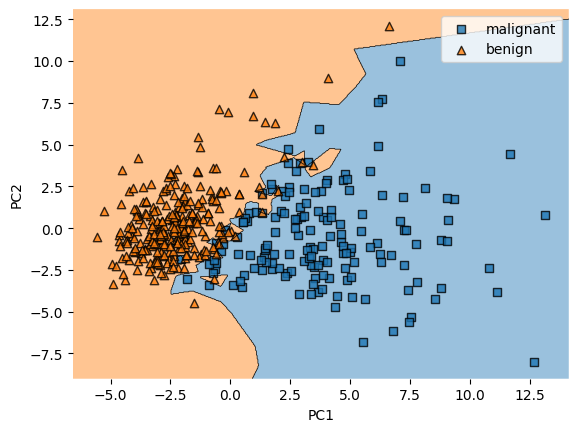

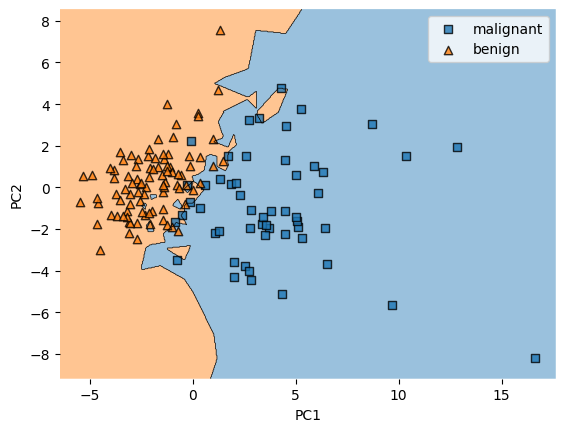

In [ ]:
from mlxtend.plotting import plot_decision_regions # libreria per le regioni di decisione

# Fissiamo il numero di componenti a 2
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std) # facciamo il calcolo degli autovettori sul training
X_test_pca = pca.transform(X_test_std) # usa le stesse componenti nel test set

# PLOT
# plot 1 -> dati proiettati sulle componenti principali
# plot 2 -> dati standardizzati su un piano che ha come componenti principali f1 ed f2
plot_2D(X_train_pca, y_train, target_names, ['PC1', 'PC2'], 0, 1, 1)
plot_2D(X_train_std, y_train, target_names, feature_names, f1, f2, 2)

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train_pca, y_train)


# TRACCIA LE REGIONI DI DECISIONE
ax = plot_decision_regions(X_train_pca, y_train, clf=classifier, legend=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, target_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Visualizza regioni sui DATI DI TEST
ax = plot_decision_regions(X_test_pca, y_test, clf=classifier, legend=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, target_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()